In [1]:
import numpy as np
import cv2
from tqdm import tqdm
from scipy.io import savemat
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,5] 

In [2]:
names = !ls ./all_bills/original/

In [3]:
imread = lambda x: cv2.resize(cv2.imread(x), (240, 320))[:, :, ::-1].astype('float32') / 255
labread = lambda x: cv2.resize(cv2.imread(x), (240, 320))[:, :, 0].astype('float32') / 255

In [4]:
imgs = np.r_[[imread('./all_bills/original/' + x) for x in tqdm(names)]]
labels = np.r_[[labread('./all_bills/processed/' + x) for x in tqdm(names)]]

100%|██████████| 304/304 [00:02<00:00, 107.39it/s]


In [5]:
i=157

In [6]:
def show(i,imgs,labls):
    f,ax = plt.subplots(1,2)
    ax[0].imshow(imgs[i])
    ax[1].imshow(labls[i], cmap='Greys_r')
    ax[0].axis('off')
    ax[1].axis('off')

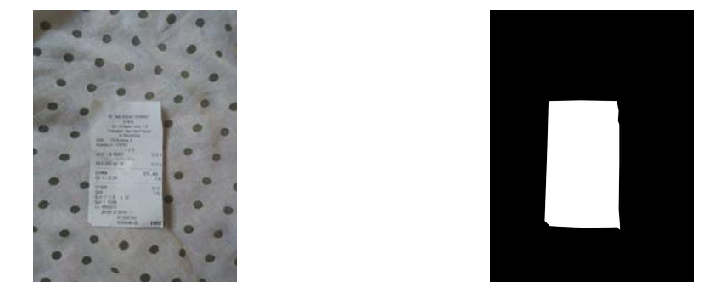

In [7]:
i = i+1
show(i,imgs,labels)

In [8]:
from imgaug import augmenters as iaa
rotate_max=30
seq = iaa.Sequential([
    iaa.Fliplr(0.7), # horizontally flip 50% of the images
],random_state=0)
rotate=iaa.Affine(rotate=(-rotate_max, rotate_max),mode='edge')
rotate_nn_interpolation=iaa.Affine(rotate=(-rotate_max, rotate_max),order=[0],mode='edge')
seq_nn_interpolation=seq.deepcopy()
seq.append(rotate)
seq_nn_interpolation.append(rotate_nn_interpolation)

In [9]:
from psutil import virtual_memory

In [10]:
batches = [np.random.choice(range(len(names)), 100) for i in range(50)]

In [11]:
augm_imgs = []
augm_labels = []

In [12]:
aug_seed=0
for batch in tqdm(batches):
    batch_images = imgs[batch, :, :, :]
    batch_labels = labels[batch, :,:]
    seq.reseed(aug_seed)
    seq_nn_interpolation.reseed(aug_seed)
    
    X = seq.augment_images(batch_images)
    Y = seq_nn_interpolation.augment_images(batch_labels)
    
    savemat('./all_bills/augs_{}.mat'.format(aug_seed),{'X': X,'Y': Y}) 
    
    aug_seed+=1

100%|██████████| 50/50 [02:31<00:00,  3.03s/it]


In [13]:
show(9, augm_imgs[3], augm_labels[3])

IndexError: list index out of range